#Data Visualization and Statistical Analysis

Dataframes created on the data_ingestion_wrangling_mc, and data_ingestion_wrangling_us scripts will be used here.

##Importing libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn import preprocessing

##Reading data

In [ ]:
hc_mc = pd.read_excel("hc_mc.xlsx", sheet_name='Sheet1')

In [ ]:
hc_mc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           583 non-null    int64         
 1   incident_date                583 non-null    datetime64[ns]
 2   bias_code                    582 non-null    object        
 3   offense                      582 non-null    object        
 4   case_status                  404 non-null    object        
 5   victim_type                  582 non-null    object        
 6   victim_count                 324 non-null    float64       
 7   suspect_count                248 non-null    float64       
 8   suspects_less_than_18_years  61 non-null     float64       
 9   suspects_18_35_years_old     52 non-null     float64       
 10  suspects_36_45_years_old     23 non-null     float64       
 11  suspects_46_55_years_old     21 non-null     

In [ ]:
hc_us = pd.read_excel("hc_us.xlsx", sheet_name='Sheet1')

In [ ]:
hc_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201376 entries, 0 to 201375
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  201376 non-null  float64
 1   year                201376 non-null  int64  
 2   state               201376 non-null  object 
 3   bias_code           201376 non-null  object 
 4   offense             201376 non-null  object 
 5   victim_type         200063 non-null  object 
 6   victim_count        201376 non-null  int64  
 7   offender_count      201376 non-null  int64  
 8   adult_offenders     32070 non-null   float64
 9   juvenile_offenders  33411 non-null   float64
 10  offender_race       112074 non-null  object 
dtypes: float64(3), int64(3), object(5)
memory usage: 16.9+ MB


##Question 5: What is the median for the number of suspects? What about the mean? Which one is more informative in this case?

In [ ]:
#Choosing a Sample
np.random.seed(180020935)
samp1 = hc_mc.iloc[np.random.randint(low=0, high=hc_mc.shape[0], size=int(round(hc_mc.shape[0]*0.1, 0)))]
samp1.shape

(58, 13)

In [ ]:
#Bootstrapping for the median
from sklearn.utils import resample
samps_medians1 = []
np.random.seed(19042020)
for i in range(1000):
  samps_medians1.append(resample(samp1)["suspect_count"].median())

In [ ]:
#95% confidence interval for the median
ci1 = np.percentile(samps_medians1, [2.5, 97.5])
print(ci1)

[1. 2.]


In [ ]:
#Bootstrapping for the mean
from sklearn.utils import resample
samps_means1 = []
np.random.seed(20200419)
for i in range(1000):
  samps_means1.append(resample(samp1)["suspect_count"].mean())

In [ ]:
#95% confidence interval for the mean
ci2 = np.percentile(samps_means1, [2.5, 97.5])
print(ci2)

[1.34609375 2.24025   ]


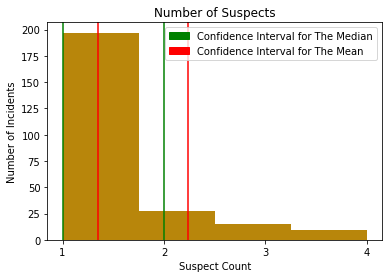

In [ ]:
#Histogram
import matplotlib.patches as mpatches

plt.hist(hc_mc.suspect_count, bins=4, color="darkgoldenrod")
plt.xlabel("Suspect Count")
plt.ylabel("Number of Incidents")
plt.title("Number of Suspects")
plt.xticks(ticks=[1, 2, 3, 4])
plt.axvline(ci1[0], color="green")
plt.axvline(ci1[1], color="green")
plt.axvline(ci2[0], color="red")
plt.axvline(ci2[1], color="red")
plt.legend(handles=[mpatches.Patch(color='green', label='Confidence Interval for The Median'), mpatches.Patch(color='red', label='Confidence Interval for The Mean')])
plt.show()

In [ ]:
#Point estimators
print(hc_mc.suspect_count.median())
print(hc_mc.suspect_count.mean())

1.0
1.3387096774193548


##Question 6: What is the median for the number of victims? What about the mean? Which one is more informative in this case?

In [ ]:
#Choosing a Sample
np.random.seed(18012000)
samp2 = hc_mc.iloc[np.random.randint(low=0, high=hc_mc.shape[0], size=int(round(hc_mc.shape[0]*0.1, 0)))]
samp2.shape

(58, 13)

In [ ]:
#Bootstrapping for the median
from sklearn.utils import resample
samps_medians2 = []
np.random.seed(2000)
for i in range(1000):
  samps_medians2.append(resample(samp2)["victim_count"].median())

In [ ]:
#95% confidence interval for the median
ci3 = np.percentile(samps_medians2, [2.5, 97.5])
print(ci3)

[1. 1.]


In [ ]:
#Bootstrapping for the mean
from sklearn.utils import resample
samps_means2 = []
np.random.seed(18)
for i in range(1000):
  samps_means2.append(resample(samp2)["victim_count"].mean())

In [ ]:
#95% confidence interval for the mean
ci4 = np.percentile(samps_means2, [2.5, 97.5])
print(ci4)

[1.03333333 1.27590996]


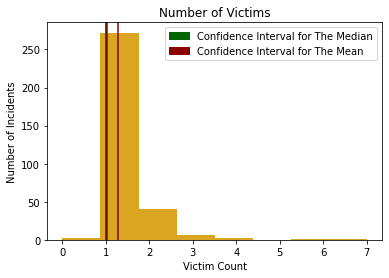

In [ ]:
#Histogram
plt.hist(hc_mc.victim_count, bins=8, color="goldenrod")
plt.xlabel("Victim Count")
plt.ylabel("Number of Incidents")
plt.title("Number of Victims")
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7])
plt.axvline(ci3[0], color="darkgreen")
plt.axvline(ci3[1], color="darkgreen")
plt.axvline(ci4[0], color="darkred")
plt.axvline(ci4[1], color="darkred")
plt.legend(handles=[mpatches.Patch(color='darkgreen', label='Confidence Interval for The Median'), mpatches.Patch(color='darkred', label='Confidence Interval for The Mean')])
plt.show()

In [ ]:
#Point estimators
print(hc_mc.victim_count.median())
print(hc_mc.victim_count.mean())

1.0
1.2067901234567902


##Question 7: Can the offense be predicted using the information given by the data?

In [ ]:
#Preparing the data
hc_mc1 = hc_mc.copy() #Creating a copy of the dataset for the model building
hc_mc1['year'] = hc_mc1["incident_date"].dt.year #Creating a year variable

###Exploring relationships between the offense and other variables

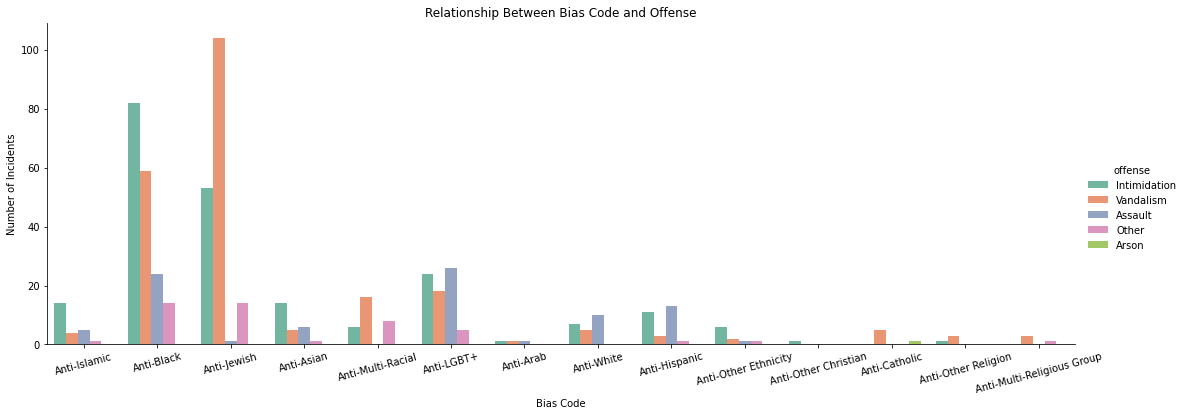

In [ ]:
#offense vs bias code
sns.set_palette(sns.color_palette("Set2"))
sns.catplot(x="bias_code", data=hc_mc, aspect=3, kind='count', hue='offense')
plt.ylabel("Number of Incidents")
plt.xlabel("Bias Code")
plt.title("Relationship Between Bias Code and Offense")
plt.xticks(rotation=15)
plt.show()

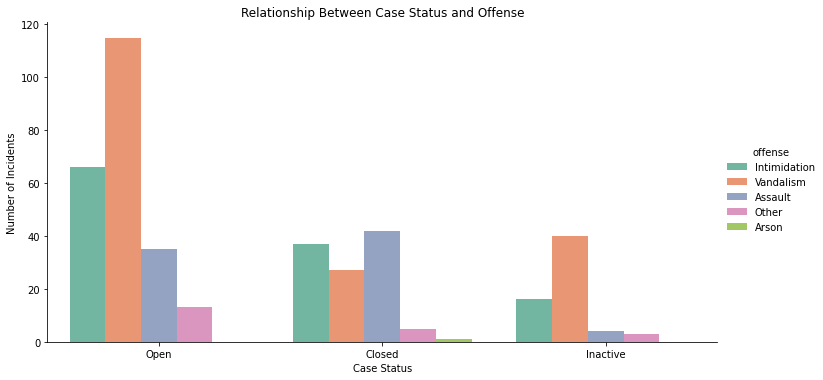

In [ ]:
#offense vs case status
sns.set_palette(sns.color_palette("Set2"))
sns.catplot(x="case_status", data=hc_mc, aspect=2, kind='count', hue='offense')
plt.ylabel("Number of Incidents")
plt.xlabel("Case Status")
plt.title("Relationship Between Case Status and Offense")
plt.show()

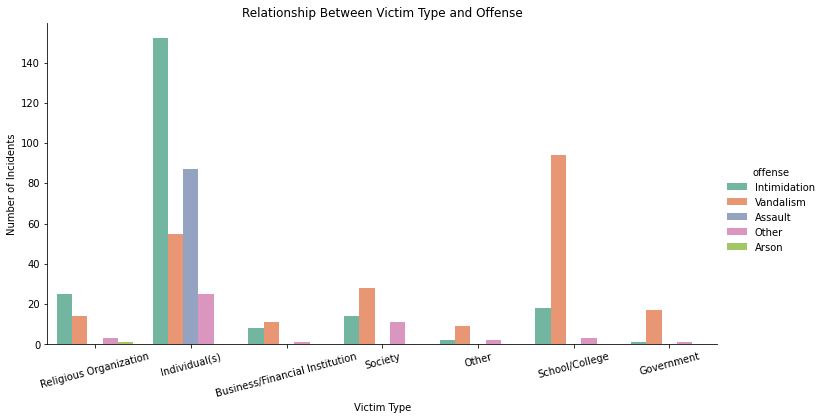

In [ ]:
#offense vs victim type
sns.set_palette(sns.color_palette("Set2"))
sns.catplot(x="victim_type", data=hc_mc, aspect=2, kind='count', hue='offense')
plt.ylabel("Number of Incidents")
plt.xlabel("Victim Type")
plt.title("Relationship Between Victim Type and Offense")
plt.xticks(rotation=15)
plt.show()

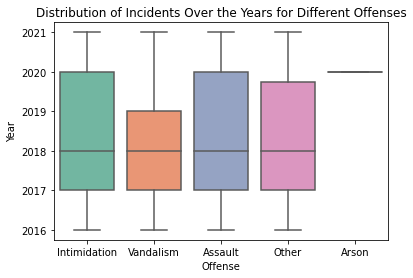

In [ ]:
#offense vs year
sns.boxplot(x="offense", y="year", data=hc_mc1)
plt.xlabel("Offense")
plt.ylabel("Year")
plt.title("Distribution of Incidents Over the Years for Different Offenses")
plt.show()

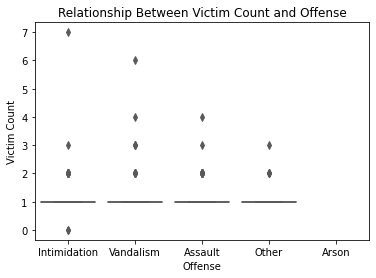

In [ ]:
#offense vs victim count
sns.boxplot(x="offense", y="victim_count", data=hc_mc)
plt.xlabel("Offense")
plt.ylabel("Victim Count")
plt.title("Relationship Between Victim Count and Offense")
plt.show() #não

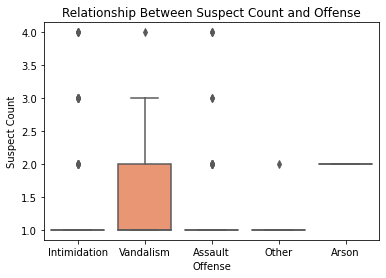

In [ ]:
#offense vs suspect count
sns.boxplot(x="offense", y="suspect_count", data=hc_mc)
plt.xlabel("Offense")
plt.ylabel("Suspect Count")
plt.title("Relationship Between Suspect Count and Offense")
plt.show()

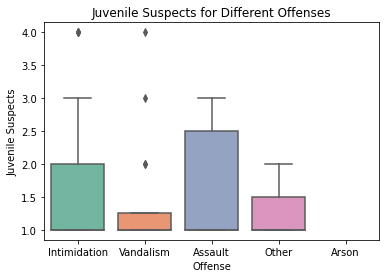

In [ ]:
#offense vs suspects_less_than_18_years
sns.boxplot(x="offense", y="suspects_less_than_18_years", data=hc_mc)
plt.xlabel("Offense")
plt.ylabel("Juvenile Suspects")
plt.title("Juvenile Suspects for Different Offenses")
plt.show()

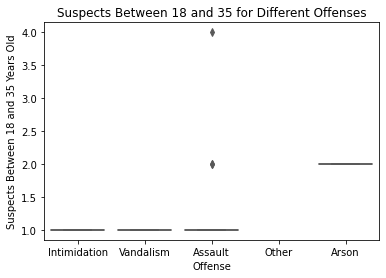

In [ ]:
#offense vs suspects_18_35_years_old
sns.boxplot(x="offense", y="suspects_18_35_years_old", data=hc_mc)
plt.xlabel("Offense")
plt.ylabel("Suspects Between 18 and 35 Years Old")
plt.title("Suspects Between 18 and 35 for Different Offenses")
plt.show() #não

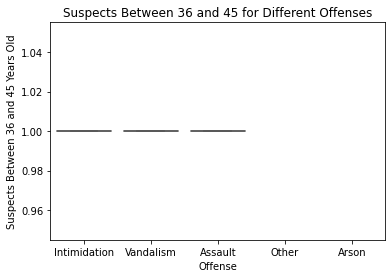

In [ ]:
#offense vs suspects_36_45_years_old
sns.boxplot(x="offense", y="suspects_36_45_years_old", data=hc_mc)
plt.xlabel("Offense")
plt.ylabel("Suspects Between 36 and 45 Years Old")
plt.title("Suspects Between 36 and 45 for Different Offenses")
plt.show() #não

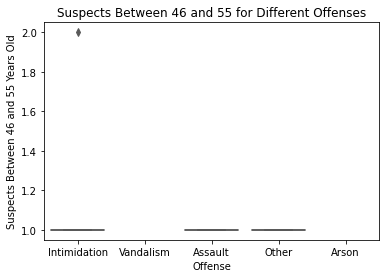

In [ ]:
#offense vs suspects_46_55_years_old
sns.boxplot(x="offense", y="suspects_46_55_years_old", data=hc_mc)
plt.xlabel("Offense")
plt.ylabel("Suspects Between 46 and 55 Years Old")
plt.title("Suspects Between 46 and 55 for Different Offenses")
plt.show() #não

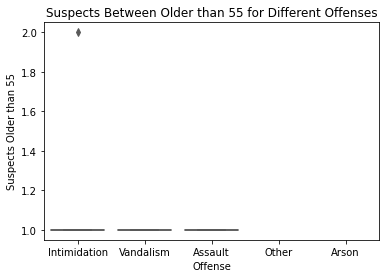

In [ ]:
#offense vs suspects_55_years_old
sns.boxplot(x="offense", y="suspects_55_years_old", data=hc_mc)
plt.xlabel("Offense")
plt.ylabel("Suspects Older than 55")
plt.title("Suspects Between Older than 55 for Different Offenses")
plt.show() #não

###Logistic Regression

In [ ]:
#Excluding some variables from the model and dealing with missing values
hc_mc1 = hc_mc1.drop(["id", "victim_count", "suspects_18_35_years_old", "suspects_36_45_years_old", "suspects_46_55_years_old", "suspects_55_years_old", "incident_date"], axis=1)
hc_mc1 = hc_mc1.dropna(subset=["year", "bias_code", "offense", "victim_type"])
hc_mc1["case_status"] = hc_mc1["case_status"].fillna("Unknown")
hc_mc1["suspect_count"] = hc_mc1["suspect_count"].fillna(0)
hc_mc1["suspects_less_than_18_years"] = hc_mc1["suspects_less_than_18_years"].fillna(0)

In [ ]:
#Separating data into explanatory variables (x) and target variable (y)
x = hc_mc1.drop(["offense"], axis=1)
x = pd.get_dummies(x)
y = hc_mc1.offense

In [ ]:
#Splitting into test and train sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2021)

In [ ]:
#Building the model
model = LogisticRegression(max_iter=1000)
scaler = preprocessing.StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [ ]:
y_test.value_counts()

Vandalism       68
Intimidation    61
Assault         29
Other           17
Name: offense, dtype: int64

In [ ]:
#Accuracy
print(accuracy_score(y_test, y_pred))

0.6685714285714286


In [ ]:
#Other measures of quality
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

     Assault       0.68      0.52      0.59        29
Intimidation       0.56      0.75      0.64        61
       Other       0.67      0.12      0.20        17
   Vandalism       0.79      0.79      0.79        68

    accuracy                           0.67       175
   macro avg       0.68      0.55      0.56       175
weighted avg       0.68      0.67      0.65       175



In [ ]:
#Confusion Matrix
print(confusion_matrix(y_test, y_pred))

[[15 14  0  0]
 [ 5 46  1  9]
 [ 0 10  2  5]
 [ 2 12  0 54]]


In [ ]:
#Looking at the predictions and at the actual values
print(y_pred)
print(y_test)

['Vandalism' 'Intimidation' 'Intimidation' 'Intimidation' 'Intimidation'
 'Vandalism' 'Vandalism' 'Assault' 'Intimidation' 'Intimidation'
 'Intimidation' 'Intimidation' 'Vandalism' 'Intimidation' 'Intimidation'
 'Intimidation' 'Vandalism' 'Intimidation' 'Vandalism' 'Intimidation'
 'Intimidation' 'Intimidation' 'Vandalism' 'Vandalism' 'Intimidation'
 'Intimidation' 'Intimidation' 'Intimidation' 'Assault' 'Vandalism'
 'Vandalism' 'Vandalism' 'Intimidation' 'Intimidation' 'Vandalism'
 'Intimidation' 'Assault' 'Intimidation' 'Vandalism' 'Intimidation'
 'Assault' 'Vandalism' 'Intimidation' 'Intimidation' 'Vandalism'
 'Vandalism' 'Intimidation' 'Intimidation' 'Other' 'Intimidation'
 'Vandalism' 'Intimidation' 'Other' 'Assault' 'Vandalism' 'Intimidation'
 'Vandalism' 'Intimidation' 'Intimidation' 'Intimidation' 'Assault'
 'Vandalism' 'Intimidation' 'Assault' 'Vandalism' 'Assault' 'Intimidation'
 'Vandalism' 'Vandalism' 'Vandalism' 'Vandalism' 'Vandalism'
 'Intimidation' 'Assault' 'Intimidatio